In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
def normalize(x):
    mean = np.mean(x)
    std = np.std(x)
    x_norm = (x - mean) / std
    return x_norm

def standardize(x):
    m = max(x)
    return x/m

def replace_outliers_zscore(x, threshold=3):
    z = np.abs((x - np.mean(x)) / np.std(x))
    x_filtered = x.copy()
    x_filtered[z >= threshold] = np.median(x)
    return x_filtered

def average_window(signal, averaging_method=np.average):
    window_size = 37
    moving_averages = []
    for i in range(window_size, len(signal) + 1, window_size):
        window = signal[i-window_size:i]
        
        avg = averaging_method(window)
        
        moving_averages.append(avg)
    return np.array(moving_averages)

class Configuration:
    def __init__(self, root, scaling, dataRange):
        self.root = root
        self.raw = r"/".join([root, "raw"])
        self.processed = r"/".join([root, "processed"])
        self.scaling = scaling
        self.dr = dataRange
        self.csv_name = "Gabe_5min_walk1.csv"

config = Configuration(root=r"M:/Datasets/shock_walk", scaling=10000, dataRange= slice(100, -1))

### Old Solution

In [3]:
csvList = [i for i in os.listdir(config.raw) if i.split(".")[-1] == "csv"]
new_csv = {}
for j, file in enumerate(csvList):
        
    file_path = r"/".join([config.raw, file])
    
    df = pd.read_csv(file_path)
    EMGS = (df.iloc[config.dr, 1::8] * config.scaling)
    print(len(EMGS))
    time = df.iloc[config.dr, 0]
    
    for i, column in enumerate(EMGS.columns):
        
        nEmg = EMGS[column].values    
        
        nEmg = replace_outliers_zscore(EMGS[column], threshold=4)
        
        nEmg = nEmg - np.mean(nEmg)
        nEmg = abs(nEmg)
        nEmg = average_window(nEmg, np.median)
        
        
        if column in new_csv.keys():
            new_csv[column] = np.append(new_csv[column], nEmg)
        else:
            new_csv[column] = nEmg
            
    print(r"/".join([config.processed, file]))
            

for i, column in enumerate(new_csv.keys()):

    new_csv[column] = normalize(new_csv[column])
    new_csv[column] = standardize(new_csv[column])
    
    
new_csv = pd.DataFrame(new_csv)
# new_csv.to_csv(r"/".join([config.processed, "total.csv"]), index=False)

116301
M:/Datasets/shock_walk/processed/2_5_mph.csv
116301
M:/Datasets/shock_walk/processed/3_1_mph.csv
20101
M:/Datasets/shock_walk/processed/QuietStance.csv
116301
M:/Datasets/shock_walk/processed/SelfSelected.csv
116301
M:/Datasets/shock_walk/processed/StandStop_2mph.csv


In [192]:
new_csv.head()

,L_Quad: EMG 1 [Volts],L_Hamstrings: EMG 2 [Volts],L_AnteriorTibialis: EMG 3 [Volts],L_Calf: EMG 4 [Volts],R_Quad: EMG 5 [Volts],R_Hamstrings: EMG 6 [Volts],R_AnteriorTibialis: EMG 7 [Volts],R_Calf: EMG 8 [Volts]
0,-0.005075,0.456542,0.933661,0.092920,-0.014055,0.010453,-0.051504,0.084343
1,-0.005075,0.456542,0.933661,0.092920,-0.014055,0.010453,-0.051504,0.084343
2,0.050884,0.066569,-0.038923,-0.150608,-0.021064,0.010453,0.026835,0.084343
3,-0.018972,0.023239,-0.112960,-0.160941,0.033357,-0.060844,-0.137533,-0.147159
4,-0.023615,0.008151,-0.112960,-0.160941,0.073824,0.007441,-0.043670,0.010049


[]

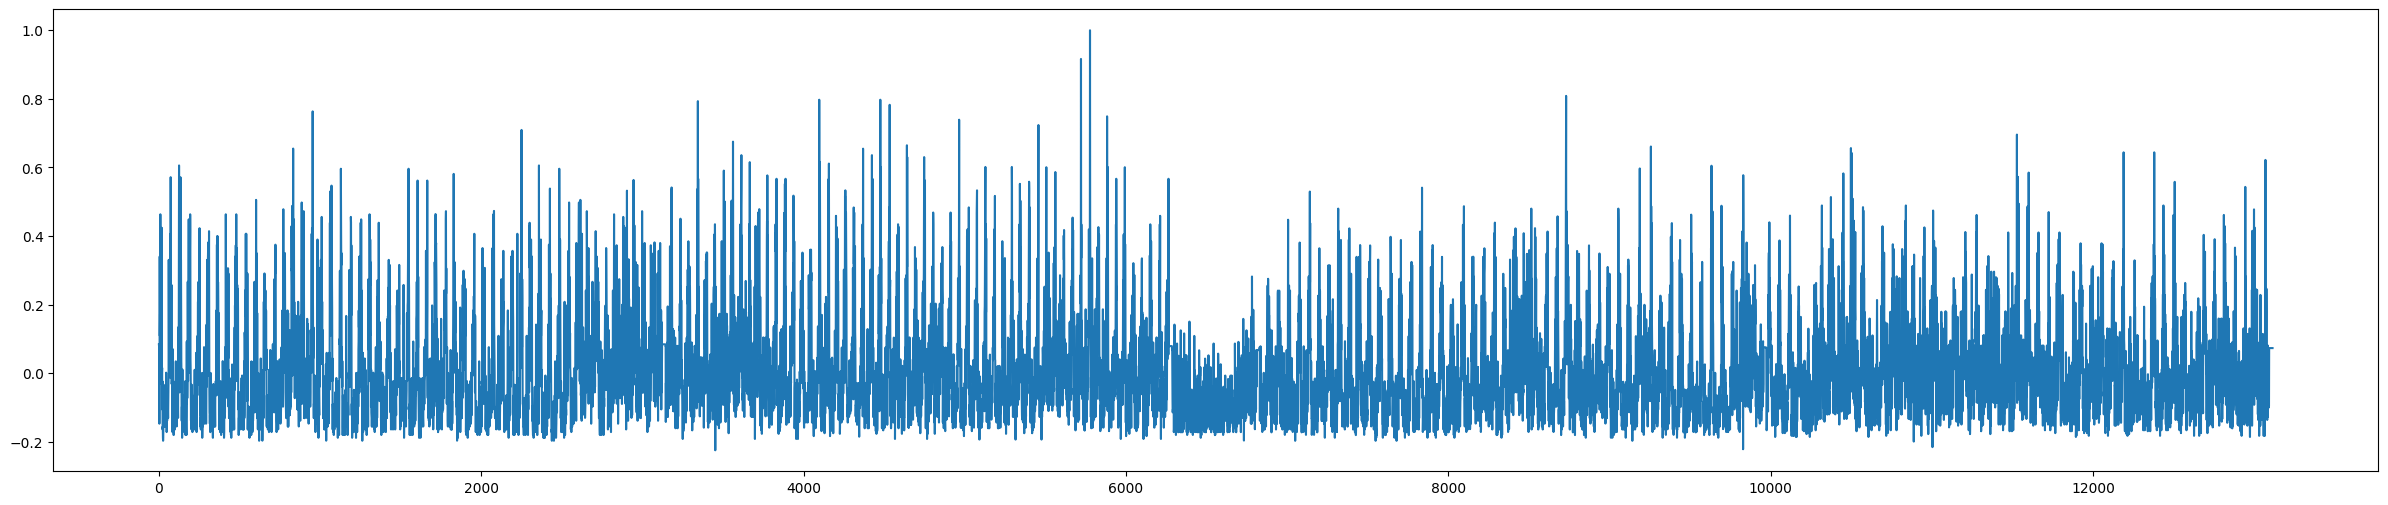

In [193]:
plt.figure(figsize=(30, 6), dpi=100)
# print(df.iloc[:,0].values)
plt.plot(new_csv.iloc[:,7].values)
plt.plot()

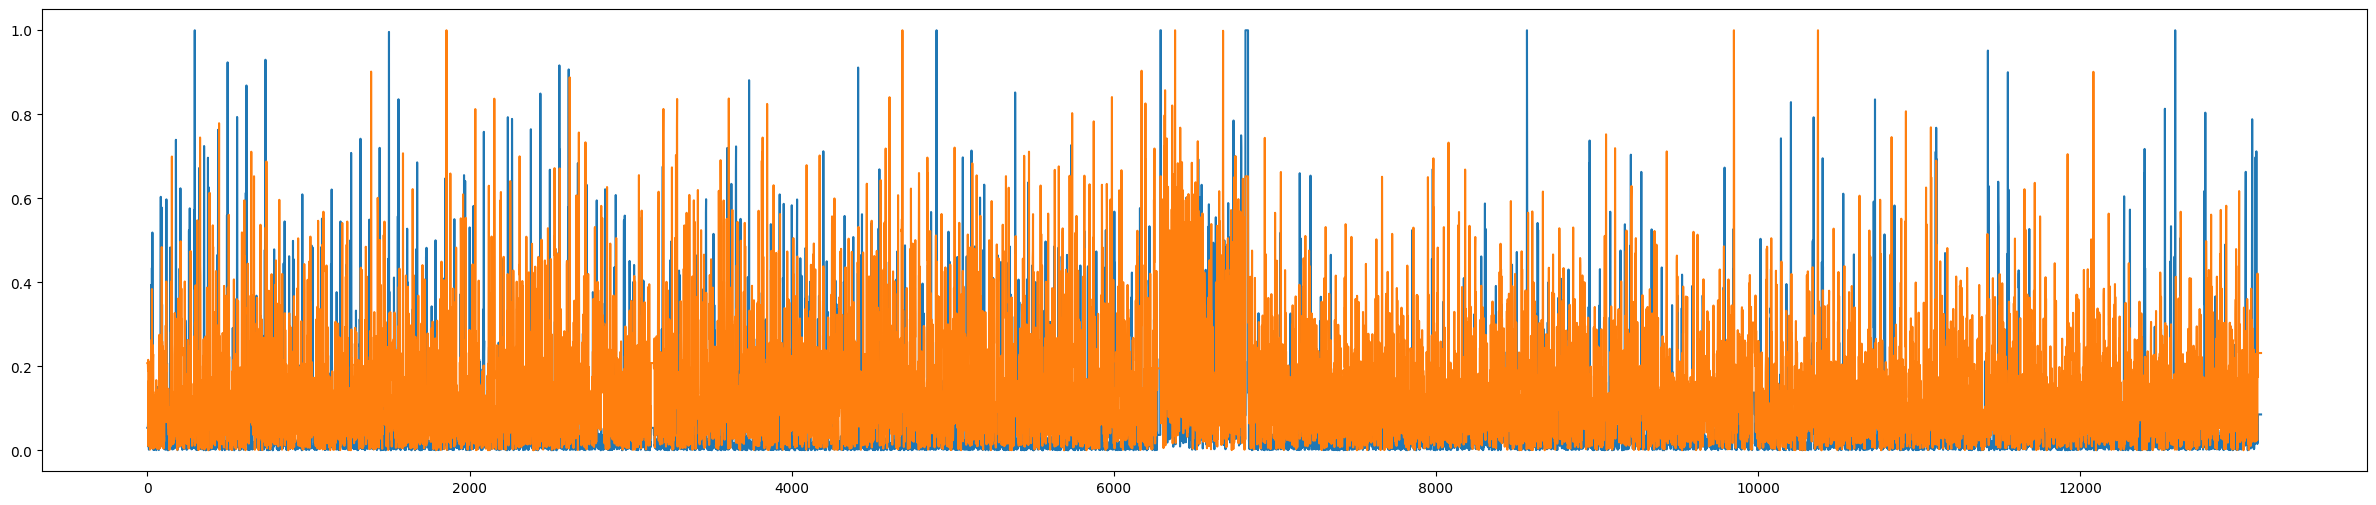

In [28]:
plt.figure(figsize=(30, 6), dpi=100)
plt.plot(new_csv[list(new_csv.keys())[0]])
plt.plot(new_csv[list(new_csv.keys())[4]])

In [ ]:
plt.figure(figsize=(30, 6), dpi=100)
plt.plot(new_csv[list(new_csv.keys())[1]])
plt.plot(new_csv[list(new_csv.keys())[5]])

In [ ]:
plt.figure(figsize=(30, 6), dpi=100)
plt.plot(new_csv[list(new_csv.keys())[2]])
plt.plot(new_csv[list(new_csv.keys())[6]])

In [ ]:
plt.figure(figsize=(30, 6), dpi=100)
plt.plot(new_csv[list(new_csv.keys())[3]])
plt.plot(new_csv[list(new_csv.keys())[7]])